# DenseNet: Densely Connected Convolutional Networks

- [Densely Connected Convolutional Networks](https://arxiv.org/abs/1608.06993)

이번에는 DenseNet(밀집 연결 합성곱 신경망)에 대해 알아보고, 그 핵심 개념을 이해한 뒤 TensorFlow와 PyTorch를 사용하여 구현해보겠습니다.

DenseNet은 각 계층이 모든 이전 계층과 직접 연결되는 신경망 구조로, 정보 흐름을 강화하고 파라미터 수를 줄여 성능을 향상시킵니다.

## 1. DenseNet 소개

### 1.1 DenseNet이란?

- DenseNet은 Densely Connected Convolutional Networks의 약자로, 각 계층이 이전의 모든 계층과 직접 연결되는 합성곱 신경망 구조입니다.

- 즉, 각 계층의 입력은 모든 이전 계층들의 출력 특징 맵의 연결(concatenation)으로 이루어집니다.
    <img src="https://gaussian37.github.io/assets/img/dl/concept/densenet/0.png">

### DenseNet의 주요 특징

- 밀집 연결(Dense Connectivity)
    - 각 계층이 모든 이전 계층으로부터 직접 입력을 받습니다.

- 특성 재사용
    - 이전 계층에서 추출된 특징을 재사용하여 효율성을 높입니다.

- 그라디언트 흐름 개선
    - 직접적인 연결을 통해 그라디언트 소실 문제를 완화합니다.

    <img src="https://gaussian37.github.io/assets/img/dl/concept/densenet/2.png">

### 1.2 배경 및 동기

신경망이 깊어질수록 다음과 같은 문제가 발생할 수 있습니다.

- 그라디언트 소실/폭발
    - 역전파 시 그라디언트가 소실되거나 폭발하여 학습이 어려워집니다.
- 특성 중복
    - 깊은 계층에서 이미 학습된 특징을 중복하여 학습할 수 있습니다.
- 파라미터 비효율성
    - 깊이가 증가함에 따라 파라미터 수가 증가하여 과적합 위험이 높아집니다.

ResNet은 잔차 연결(residual connections)을 도입하여 이러한 문제를 완화하였으며, DenseNet은 이를 확장하여 밀집 연결을 통해 더욱 효율적인 학습을 가능하게 합니다.



<img src='https://gaussian37.github.io/assets/img/dl/concept/densenet/7.png'>

## 2. DenseNet의 주요 개념

### 2.1 Dense Connectivity
- **밀집 연결(Dense Connectivity)**은 각 계층이 이전의 모든 계층으로부터 입력을 받고, 자신의 출력을 이후의 모든 계층에 전달하는 것을 의미합니다.
- 계층 $𝑙$의 입력은 이전 계층들의 특징 맵을 모두 연결한 것입니다.
- 이를 수식으로 나타내면
    - $x_l​=H_l​([x_0​,x_1​,…,x_{l−1)​}])$

        - ${x_l}$: $l$번째 계층의 출력.
        - $H_l(⋅)$: 비선형 변환 함수(예: Batch Norm, ReLU, Conv).
        - $[x_0 ,x_1,…,x_{l-1}]$: Layer 0부터 ${l−1)​}$까지의 출력 특징 맵의 연결.

<img src="https://gaussian37.github.io/assets/img/dl/concept/densenet/0.png">

<img src="https://gaussian37.github.io/assets/img/dl/concept/densenet/13.png">

### 2.2 성장률(Growth Rate)

- **성장률(𝑘)**는 각 계층에서 생성되는 새로운 특징 맵의 수를 나타냅니다.
- DenseNet에서 각 계층은 𝑘개의 특징 맵을 생성하고, 이들은 다음 계층으로 전달됩니다.
- 따라서 계층 𝑙의 입력 채널 수는 $𝑘_0 + 𝑘 × ( 𝑙 − 1 )$이 됩니다.
    - 𝑘_0: 입력 계층의 채널 수

### 2.3 병목 계층(Bottleneck Layers)

계산 효율성을 높이기 위해 DenseNet은 병목 계층을 사용합니다.

    - 1x1 합성곱: 3x3 합성곱 전에 입력 채널 수를 줄입니다.
    - 파라미터와 계산량 감소: 3x3 합성곱의 입력 채널 수를 감소시켜 효율성 향상.

<img src="https://gaussian37.github.io/assets/img/dl/concept/densenet/14.png">

<img src="https://gaussian37.github.io/assets/img/dl/concept/densenet/15.png">

### 2.4 압축(Compression)

- Compression은 Dense Block 사이의 Transition Layer에서 채널 수를 줄이는 기법입니다.
- 압축 비율 𝜃를 사용하여 채널 수를 조절합니다.
    - $0<θ≤1$

- 예를 들어, $θ=0.5$이면 채널 수를 절반으로 줄입니다.

<img src="https://gaussian37.github.io/assets/img/dl/concept/densenet/21.png">

### 2.5 Dense Block과 Transition Layer

- Dense Block: 밀집 연결을 사용하는 계층들의 집합
- Transition Layer: Dense Block 사이에 위치하여 특성 맵의 크기와 채널 수를 조절하는 계층
    - 구성: Batch Normalization -> 1x1 Conv -> 2x2 Average Pooling


### 3. DenseNet의 장점

- 그라디언트 소실 문제 완화: 모든 계층에 직접적인 그라디언트 전달이 가능하여 학습이 용이합니다.
- 특성 재사용: 이전 계층들의 출력을 모두 활용하여 각 계층이 유용한 정보를 재사용합니다.
- 파라미터 효율성: 특성 맵을 재사용하므로 적은 수의 파라미터로도 높은 성능을 달성합니다.
- 강화된 정보 흐름: 네트워크 내에서 정보와 그라디언트의 흐름이 강화되어 학습 성능이 향상됩니다.


## 4. TensorFlow를 사용한 DenseNet 구현

### 4.1 필요한 라이브러리 import

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

### 4.2 Dense Layer 구현

In [ ]:
def dense_layer(x, growth_rate):
    # 병목 계층
    x1 = layers.BatchNormalization()(x)
    x1 = layers.Activation('relu')(x1)
    x1 = layers.Conv2D(4 * growth_rate, kernel_size=1, padding='same', use_bias=False)(x1)

    # 3x3 합성곱
    x1 = layers.BatchNormalization()(x1)
    x1 = layers.Activation('relu')(x1)
    x1 = layers.Conv2D(growth_rate, kernel_size=3, padding='same', use_bias=False)(x1)

    # 입력과 출력 연결
    x = layers.Concatenate()([x, x1])
    return x

- 병목 계층(Bottleneck Layer)

    - 1x1 합성곱으로 입력 채널 수를 줄여 계산량을 감소시킵니다.
    - Batch Normalization과 ReLU 활성화를 적용합니다.

- 3x3 합성곱

    - 특징을 추출하고 새로운 정보를 추가합니다.
    - Batch Normalization과 ReLU 활성화를 적용합니다.

- 연결(Concatenation)

    - 입력과 출력을 채널 방향으로 연결하여 밀집 연결을 구현합니다.

### 4.3 Dense Block 구현

In [ ]:
def dense_block(x, num_layers, growth_rate):
    for _ in range(num_layers):
        x = dense_layer(x, growth_rate)
    return x

- dense_block 함수는 여러 개의 Dense Layer를 쌓아 Dense Block을 구성합니다.
- 각 Dense Layer의 출력은 다음 Dense Layer에 연결됩니다.

### 4.4 Transition Layer 구현

In [ ]:
def transition_layer(x, compression):
    # Batch Normalization
    x = layers.BatchNormalization()(x)
    # ReLU 활성화 함수
    x = layers.Activation('relu')(x)
    # 채널 수 줄이기
    reduced_channels = int(tf.keras.backend.int_shape(x)[-1] * compression)
    x = layers.Conv2D(reduced_channels, kernel_size=1, padding='same', use_bias=False)(x)
    # Average Pooling으로 크기 줄이기
    x = layers.AveragePooling2D(pool_size=2, strides=2, padding='same')(x)
    return x


- transition_layer 함수는 Dense Block 사이에 위치하여 특성 맵의 크기와 채널 수를 줄입니다.
- 압축 비율 compression을 사용하여 채널 수를 조절합니다.

### 4.5 DenseNet 모델 구성

In [ ]:
def DenseNet(input_shape=(224, 224, 3), num_classes=1000, growth_rate=32, compression=0.5):
    # 입력 계층
    inputs = layers.Input(shape=input_shape)

    # 초기 합성곱 계층
    x = layers.Conv2D(2 * growth_rate, kernel_size=7, strides=2, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Dense Block 1
    x = dense_block(x, num_layers=6, growth_rate=growth_rate)
    x = transition_layer(x, compression)

    # Dense Block 2
    x = dense_block(x, num_layers=12, growth_rate=growth_rate)
    x = transition_layer(x, compression)

    # Dense Block 3
    x = dense_block(x, num_layers=24, growth_rate=growth_rate)
    x = transition_layer(x, compression)

    # Dense Block 4
    x = dense_block(x, num_layers=16, growth_rate=growth_rate)

    # 분류기
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # 모델 생성
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# 모델 생성
model = DenseNet(input_shape=(224, 224, 3), num_classes=1000, growth_rate=32, compression=0.5)

- DenseNet 함수는 전체 모델을 구성합니다.
- 네 개의 Dense Block과 세 개의 Transition Layer로 구성됩니다.
- 각 Dense Block의 num_layers는 원하는 네트워크 깊이에 따라 조절할 수 있습니다.
- 마지막에 Global Average Pooling과 전결합(Dense) 계층을 통해 분류를 수행합니다.


### 4.6 모델 요약


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 112, 112, 64)   │          9,408 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 112, 112, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 56, 56, 64)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 56, 56, 64)     │            256 │ max_pooling2d[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 56, 56, 128)    │          8,192 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 128)    │            512 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 56, 56, 128)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 56, 56, 32)     │         36,864 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 56, 56, 96)     │              0 │ max_pooling2d[0][0],   │
│                           │                        │                │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 56, 56, 96)     │            384 │ concatenate[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 56, 56, 96)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 56, 56, 128)    │         12,288 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 56, 56, 128)    │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 8,062,504 (30.76 MB)

 Trainable params: 7,978,856 (30.44 MB)

 Non-trainable params: 83,648 (326.75 KB)

## 5. PyTorch를 사용한 DenseNet 구현


## 5.1 필요한 라이브러리 import

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### 5.2 Bottleneck Layer 구현

In [ ]:
class Bottleneck(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super(Bottleneck, self).__init__()
        inter_channels = 4 * growth_rate
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels, inter_channels, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(inter_channels)
        self.conv2 = nn.Conv2d(inter_channels, growth_rate, kernel_size=3, padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(F.relu(self.bn1(x)))
        out = self.conv2(F.relu(self.bn2(out)))
        out = torch.cat([x, out], 1)
        return out

- 1x1 합성곱

    - 입력 채널 수를 줄여 계산 효율성을 높입니다.
    - Batch Normalization과 ReLU 활성화를 적용합니다.

- 3x3 합성곱

    - 새로운 특징을 생성합니다.
    - Batch Normalization과 ReLU 활성화를 적용합니다.

- 연결

    - 입력과 출력을 채널 방향으로 연결합니다.

### 5.3 Transition Layer 구현

In [ ]:
class Transition(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Transition, self).__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        out = self.conv(F.relu(self.bn(x)))
        out = self.pool(out)
        return out

- Transition 클래스는 Dense Block 사이의 Transition Layer를 구현합니다.

- 1x1 합성곱

    - 채널 수를 압축합니다.
    - Batch Normalization과 ReLU 활성화를 적용합니다.

- 평균 풀링
    - 공간 크기를 줄입니다.


### 5.4 Dense Block 구현

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_layers, in_channels, growth_rate):
        super(DenseBlock, self).__init__()
        layers = []
        for i in range(num_layers):
            layers.append(Bottleneck(in_channels + i * growth_rate, growth_rate))
        self.layer = nn.Sequential(*layers)

    def forward(self, x):
        return self.layer(x)


- DenseBlock 클래스는 여러 개의 Bottleneck Layer를 쌓아 Dense Block을 구성합니다.
- 각 Bottleneck Layer의 입력 채널 수는 이전의 모든 출력 채널 수의 합입니다.

### 5.5 DenseNet 모델 구성

In [ ]:
class DenseNet(nn.Module):
    def __init__(self, num_classes=1000, growth_rate=32, compression=0.5):
        super(DenseNet, self).__init__()
        num_init_features = 2 * growth_rate

        # 초기 합성곱 및 풀링
        self.conv1 = nn.Conv2d(3, num_init_features, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(num_init_features)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # Dense Block 1
        num_features = num_init_features
        self.block1 = DenseBlock(num_layers=6, in_channels=num_features, growth_rate=growth_rate)
        num_features += 6 * growth_rate
        out_features = int(num_features * compression)
        self.trans1 = Transition(num_features, out_features)
        num_features = out_features

        # Dense Block 2
        self.block2 = DenseBlock(num_layers=12, in_channels=num_features, growth_rate=growth_rate)
        num_features += 12 * growth_rate
        out_features = int(num_features * compression)
        self.trans2 = Transition(num_features, out_features)
        num_features = out_features

        # Dense Block 3
        self.block3 = DenseBlock(num_layers=24, in_channels=num_features, growth_rate=growth_rate)
        num_features += 24 * growth_rate
        out_features = int(num_features * compression)
        self.trans3 = Transition(num_features, out_features)
        num_features = out_features

        # Dense Block 4
        self.block4 = DenseBlock(num_layers=16, in_channels=num_features, growth_rate=growth_rate)
        num_features += 16 * growth_rate

        # 분류기
        self.bn_final = nn.BatchNorm2d(num_features)
        self.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.trans1(self.block1(x))
        x = self.trans2(self.block2(x))
        x = self.trans3(self.block3(x))
        x = self.block4(x)
        x = F.relu(self.bn_final(x))
        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# 모델 생성
model = DenseNet()

- 초기 계층

    - 합성곱, Batch Normalization, ReLU, Max Pooling을 적용합니다.

- Dense Block과 Transition Layer

    - 네 개의 Dense Block과 Transition Layer를 순차적으로 쌓습니다.
    - 각 Dense Block의 계층 수는 [6, 12, 24, 16]입니다.

- 분류 계층

    - Adaptive Average Pooling을 사용하여 입력 크기에 상관없이 출력 크기를 (1, 1)로 맞춥니다.
    - Fully Connected Layer를 통해 최종 분류를 수행합니다.

### 5.6 모델 요약

In [ ]:
from torchsummary import summary

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

summary(model, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]           8,192
       BatchNorm2d-8          [-1, 128, 56, 56]             256
              ReLU-9          [-1, 128, 56, 56]               0
           Conv2d-10           [-1, 32, 56, 56]          36,864
       Bottleneck-11           [-1, 96, 56, 56]               0
      BatchNorm2d-12           [-1, 96, 56, 56]             192
             ReLU-13           [-1, 96, 56, 56]               0
           Conv2d-14          [-1, 128,

## 6. 전이 학습을 통한 사전 학습된 DenseNet 모델 사용

## 6.1 TensorFlow에서의 구현

### 필요한 라이브러리 import

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

### 사전 학습된 DenseNet 모델 로드

In [ ]:
densenet_pretrained = DenseNet201(include_top=True, weights='imagenet',
                  input_tensor=None, input_shape=None,
                  pooling=None, classes=1000)

densenet_pretrained.summary()

82524592/82524592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "densenet201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 20,242,984 (77.22 MB)

 Trainable params: 20,013,928 (76.35 MB)

 Non-trainable params: 229,056 (894.75 KB)

### 이미지 불러오기 및 전처리

--2024-10-25 07:41:27--  https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188036 (184K) [image/jpeg]
Saving to: ‘zebra.jpg’

zebra.jpg           100%[===================>] 183.63K  --.-KB/s    in 0.07s   

2024-10-25 07:41:27 (2.64 MB/s) - ‘zebra.jpg’ saved [188036/188036]



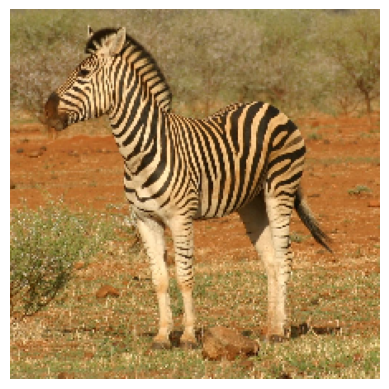

In [ ]:
# 이미지 다운로드 (예: 얼룩말 사진)
!wget -O zebra.jpg https://upload.wikimedia.org/wikipedia/commons/f/f0/Zebra_standing_alone_crop.jpg

# 이미지 로드 및 전처리
img = image.load_img('zebra.jpg', target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


### 예측 및 결과 해석


In [ ]:
preds = densenet_pretrained.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted: [('n02391049', 'zebra', 0.92991936), ('n01518878', 'ostrich', 0.020074116), ('n02423022', 'gazelle', 0.012079935)]


### 예측 결과
- 가장 높은 확률로 zebra(얼룩말)으로 분류되었습니다.

## 6.2 PyTorch에서의 구현

### 필요한 라이브러리 import

In [ ]:
import torchvision.models as models
from torchvision import transforms
from PIL import Image

### 사전 학습된 DenseNet 모델 로드
- PyTorch에서는 DenseNet 모델을 제공합니다.

In [ ]:
densenet_pretrained = models.densenet161(pretrained=True)
densenet_pretrained.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100%|██████████| 110M/110M [00:00<00:00, 138MB/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

### 이미지 불러오기 및 전처리

In [ ]:
# 이미지 로드
img = Image.open('zebra.jpg')

# 이미지 전처리
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],  # ImageNet의 평균
        std=[0.229, 0.224, 0.225]    # ImageNet의 표준편차
    )
])

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)


### 예측 및 결과 해석

In [ ]:
with torch.no_grad():
    out = densenet_pretrained(batch_t)

# ImageNet의 클래스 인덱스 로드
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

# 예측 결과 확인
probabilities = torch.nn.functional.softmax(out[0], dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5)

for i in range(top5_prob.size(0)):
    print(classes[top5_catid[i]], top5_prob[i].item())


--2024-10-25 07:41:43--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2024-10-25 07:41:43 (19.7 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]

zebra 0.9959611296653748
hartebeest 0.00169573281891644
impala 0.00045737417531199753
gazelle 0.00045069694169797003
warthog 0.00015631740097887814


### 예측 결과

- 가장 높은 확률로 zebra(얼룩말)으로 분류되었습니다.

## 6. 결론

- 이번에는 DenseNet의 구조와 핵심 개념을 이해하고, TensorFlow와 PyTorch로 직접 구현해보았습니다.

- **밀집 연결(Dense Connectivity)**를 통해 각 계층이 모든 이전 계층의 출력을 입력으로 받아 정보 흐름을 강화합니다.
- **성장률(Growth Rate)**은 각 계층이 추가하는 새로운 특징 맵의 수를 조절하여 모델의 용량과 효율성을 조절합니다.
- **병목 계층(Bottleneck Layers)**과 압축(Compression) 기법을 통해 계산량과 모델 크기를 줄입니다.
- TensorFlow와 PyTorch에서의 구현 방법을 익히고, 사전 학습된 모델을 활용하여 전이 학습을 수행하는 방법을 배웠습니다.

DenseNet을 이해하고 구현함으로써 효율적이고 성능이 뛰어난 딥러닝 모델을 개발할 수 있습니다.

### Reference
- [DenseNet (Densely connected convolution networks)
](https://gaussian37.github.io/dl-concept-densenet/)